In [27]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score

In [28]:
data = pd.read_csv('../data/healthcare-dataset-stroke-data.csv')

In [29]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [30]:
data.shape

(5110, 12)

In [31]:
data.drop(data[data.gender == 'Other'].index, inplace=True)
data.drop(['id', 'avg_glucose_level'], axis=1, inplace=True)

<Axes: >

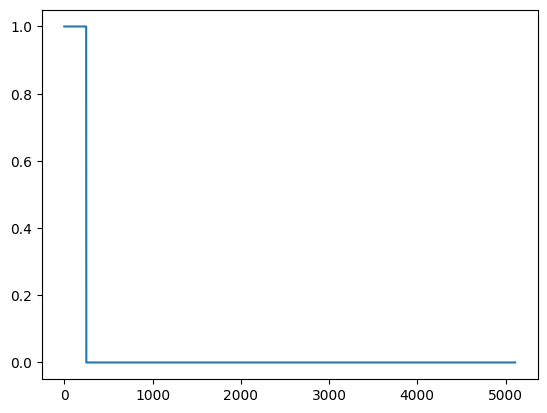

In [32]:
# # Shuffle the date to see if this changes things: 
# # 
# data = data.sample(frac=1, random_state=42).reset_index(drop=True)
# # data = data.sample(frac=1, random_state=42)

# print(data.describe())
# print(data.head())

data.stroke.plot(kind='line')

In [33]:
#data = data[data['stroke']==1]

Y = data[['stroke']]
X = data.drop('stroke', axis=1)

#Y.head(25)

print("X.shape: ", X.shape)
print("Y.shape: ", Y.shape)

# Counting the values in 'stroke':
print(Y['stroke'].value_counts())

print(249/4860)


X.shape:  (5109, 9)
Y.shape:  (5109, 1)
stroke
0    4860
1     249
Name: count, dtype: int64
0.05123456790123457


In [34]:
#model = RandomForestClassifier(max_depth=15)
model = RandomForestClassifier()

categorical_cols = data.select_dtypes(include=[object]).columns

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop = 'if_binary'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_cols)
    ],
    remainder='passthrough')

my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                ('model', model)
                                ])

In [35]:
# X = X[:100]
# Y = Y[:100]

my_pipeline.fit(X, Y)

/home/hrbjoern/anaconda3/envs/streamlit_2024-07-23/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/hrbjoern/anaconda3/envs/streamlit_2024-07-23/lib/python3.12/site-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='if_binary'))]),
                                                  Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object'))])),
                ('model', RandomForestClassifier())])

In [36]:
predictions = my_pipeline.predict(X)
print(precision_score(Y, predictions))
print(recall_score(Y, predictions))
print(classification_report(Y, predictions))


0.9959839357429718
0.9959839357429718
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4860
           1       1.00      1.00      1.00       249

    accuracy                           1.00      5109
   macro avg       1.00      1.00      1.00      5109
weighted avg       1.00      1.00      1.00      5109



## Model evaluation, cross-validation: 

In [37]:
# Try evaluation: 
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Split the data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

# # Initialize and train the RandomForestClassifier
# clf = RandomForestClassifier(random_state=42)
# clf.fit(X_train, y_train)

# Scrap the cross-validation for a second
# Specify cross-validation strategy
cv_strategy = KFold(n_splits=5, random_state=42, shuffle=True)

# Evaluate the model using cross-validation
cv_scores = cross_val_score(my_pipeline, X_train, y_train, cv=cv_strategy, scoring='accuracy')

print(f"\nCV Scores: {cv_scores}")
print(f"CV Mean Score: {cv_scores.mean()}\n")


# You can still fit the pipeline to the entire training set and evaluate on the test set if needed
my_pipeline.fit(X_train, y_train)

# Make predictions on the test set
predictions = my_pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)
class_report = classification_report(y_test, predictions)

print(f"\nAccuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

/home/hrbjoern/anaconda3/envs/streamlit_2024-07-23/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/hrbjoern/anaconda3/envs/streamlit_2024-07-23/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/hrbjoern/anaconda3/envs/streamlit_2024-07-23/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/hrbjoern/anaconda3/envs/streamlit_2024-07-23/lib/python3.12/site-packages/sklea


CV Scores: [0.95391061 0.94545455 0.95384615 0.94405594 0.94825175]
CV Mean Score: 0.9491038012267063



/home/hrbjoern/anaconda3/envs/streamlit_2024-07-23/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)



Accuracy: 0.9432485322896281
Confusion Matrix:
[[1443   10]
 [  77    3]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1453
           1       0.23      0.04      0.06        80

    accuracy                           0.94      1533
   macro avg       0.59      0.52      0.52      1533
weighted avg       0.91      0.94      0.92      1533



## Try oversampling:

Before oversampling:
X.shape:  (5109, 9)
Y.shape:  (5109, 1)

After oversampling:
X_over.shape:  (9720, 9)
Y_over.shape:  (9720, 1)

Counting the values in "Y[stroke]":
stroke
0    4860
1     249
Name: count, dtype: int64
Counting the values in "Y_over[stroke]":
stroke
1    4860
0    4860
Name: count, dtype: int64


/home/hrbjoern/anaconda3/envs/streamlit_2024-07-23/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)



Accuracy: 0.9838820301783264
Confusion Matrix:
[[1378   47]
 [   0 1491]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1425
           1       0.97      1.00      0.98      1491

    accuracy                           0.98      2916
   macro avg       0.98      0.98      0.98      2916
weighted avg       0.98      0.98      0.98      2916



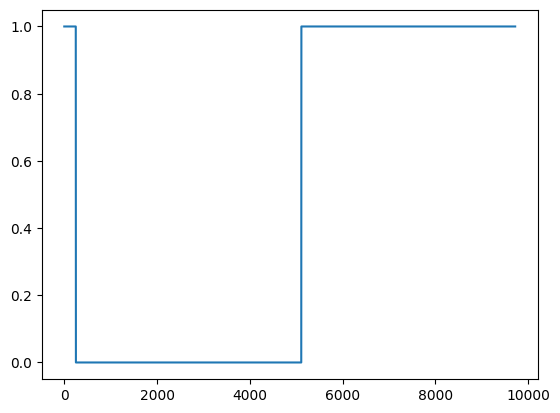

In [39]:
print("Before oversampling:")
print("X.shape: ", X.shape)
print("Y.shape: ", Y.shape)

# Try oversampling: 
# 
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
 
#print("Original class distribution:", Counter(Y))
# Oversampling using RandomOverSampler
oversample = RandomOverSampler(sampling_strategy='minority')
X_over, Y_over = oversample.fit_resample(X, Y)

#X_over = X_over[:5000]
#Y_over = Y_over[:5000]

Y_over.stroke.plot(kind='line')

print("\nAfter oversampling:")
print("X_over.shape: ", X_over.shape)
print("Y_over.shape: ", Y_over.shape)

# Counting the values in 'stroke':
print('\nCounting the values in "Y[stroke]":')
print(Y['stroke'].value_counts())
print('Counting the values in "Y_over[stroke]":')
print(Y_over['stroke'].value_counts())


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_over, Y_over, test_size=0.3)#, random_state=42)

# # Initialize and train the RandomForestClassifier
my_pipeline.fit(X_train, y_train)

# Make predictions on the test set
# predictions = my_pipeline.predict(X_test)
predictions = my_pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)
class_report = classification_report(y_test, predictions)

print(f"\nAccuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

## Test new model/pipeline on old data: 


In [ ]:
# Split the data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

# # Initialize and train the RandomForestClassifier
# clf = RandomForestClassifier(random_state=42)
# clf.fit(X_train, y_train)

# # Scrap the cross-validation for a second
# # Specify cross-validation strategy
# cv_strategy = KFold(n_splits=5, random_state=42, shuffle=True)

# # Evaluate the model using cross-validation
# cv_scores = cross_val_score(my_pipeline, X_train, y_train, cv=cv_strategy, scoring='accuracy')

# print(f"\nCV Scores: {cv_scores}")
# print(f"CV Mean Score: {cv_scores.mean()}\n")


# You can still fit the pipeline to the entire training set and evaluate on the test set if needed
#my_pipeline.fit(X_train, y_train)

# Make predictions on the test set
predictions = my_pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)
class_report = classification_report(y_test, predictions)

print(f"\nAccuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Accuracy: 0.9817351598173516
Confusion Matrix:
[[1434   28]
 [   0   71]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1462
           1       0.72      1.00      0.84        71

    accuracy                           0.98      1533
   macro avg       0.86      0.99      0.91      1533
weighted avg       0.99      0.98      0.98      1533



In [ ]:
# Save model to pickle file: 
import joblib
joblib.dump(my_pipeline, '../data/Bjoern_model.pkl', compress = 1)

['../data/Bjoern_model.pkl']

In [52]:
print('Just a test:')

a = np.array([3])
#a = [1, 2, 3, 4, 5]


#
print('a!') if a==1 else print('no!')

type(predictions)

#print('p!') if predictions==1 else print('no!')


Just a test:
no!


numpy.ndarray

In [ ]:
# Test predictions for small subset where stroke==1:
#stroketrue = pd.where(Y['stroke']==1)

#print(stroketrue)

print(Y)
print(Y['stroke']==1)

stroketrue = np.where(Y['stroke']==1)
print(stroketrue)

#X_stroketrue = X[stroketrue]
#X_stroketrue.shape

# predictions = my_pipeline.predict(X_stroketrue)

#print(precision_score(Y[stroketrue], predictions))
#print(recall_score(Y[stroketrue], predictions))


      stroke
0          1
1          1
2          1
3          1
4          1
...      ...
5105       0
5106       0
5107       0
5108       0
5109       0

[5109 rows x 1 columns]
0        True
1        True
2        True
3        True
4        True
        ...  
5105    False
5106    False
5107    False
5108    False
5109    False
Name: stroke, Length: 5109, dtype: bool
(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 1

In [ ]:
my_pipeline.steps[1][1].feature_importances_

array([2.82606394e-02, 4.43190076e-02, 1.08087111e-02, 6.04237704e-05,
       1.57261824e-02, 1.60134277e-02, 1.43814381e-02, 2.70540650e-02,
       1.26901784e-02, 1.47674507e-02, 1.88803341e-02, 1.44163175e-02,
       4.61332531e-01, 3.58152665e-02, 2.71960126e-02, 2.58278014e-01])

In [ ]:
my_pipeline[:-1].get_feature_names_out()

array(['cat__gender_Male', 'cat__ever_married_Yes',
       'cat__work_type_Govt_job', 'cat__work_type_Never_worked',
       'cat__work_type_Private', 'cat__work_type_Self-employed',
       'cat__work_type_children', 'cat__Residence_type_Urban',
       'cat__smoking_status_Unknown',
       'cat__smoking_status_formerly smoked',
       'cat__smoking_status_never smoked', 'cat__smoking_status_smokes',
       'remainder__age', 'remainder__hypertension',
       'remainder__heart_disease', 'remainder__bmi'], dtype=object)

In [ ]:
# just an attempt on the two most important features
Xtrain = X[['age','bmi']]
model.fit(Xtrain, Y)
print(precision_score(Y, model.predict(Xtrain)))
print(recall_score(Y, model.predict(Xtrain)))

/home/hrbjoern/anaconda3/envs/streamlit_2024-07-23/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


0.9195402298850575
0.642570281124498


In [ ]:
single_case = pd.DataFrame(['Male', 40.0, 0, 0, 1, 'Self-employed', 'Urban', 16, 'formerly smoked']).T
single_case.columns = X.columns
single_case = single_case.astype({'age': float, 'hypertension': int, 'heart_disease': int, 'bmi': float})
#single_case.hypertension.astype(int)
#single_case.heart_disease.astype(int)
#single_case.bmi.astype(float)
single_case.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          1 non-null      object 
 1   age             1 non-null      float64
 2   hypertension    1 non-null      int64  
 3   heart_disease   1 non-null      int64  
 4   ever_married    1 non-null      object 
 5   work_type       1 non-null      object 
 6   Residence_type  1 non-null      object 
 7   bmi             1 non-null      float64
 8   smoking_status  1 non-null      object 
dtypes: float64(2), int64(2), object(5)
memory usage: 204.0+ bytes


In [ ]:
my_pipeline.predict(single_case)

ValueError: Found unknown categories [1] in column 1 during transform

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5109 entries, 0 to 5109
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          5109 non-null   object 
 1   age             5109 non-null   float64
 2   hypertension    5109 non-null   int64  
 3   heart_disease   5109 non-null   int64  
 4   ever_married    5109 non-null   object 
 5   work_type       5109 non-null   object 
 6   Residence_type  5109 non-null   object 
 7   bmi             4908 non-null   float64
 8   smoking_status  5109 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 528.2+ KB
